In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [42]:
data = pd.read_csv('./data/USD_CNY.csv')
index_date = data.Fecha.apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y'))
index_date = index_date.apply(lambda x: x.strftime('%Y-%m-%d'))

data.index = pd.to_datetime(index_date)
data = data.drop('Fecha', axis='columns')
data = data.apply(lambda x: x.str.replace(',','.'))
data = data.apply(lambda x: x.str.replace('%',''))
data = data.astype(np.float)
data.head()

,Último,Apertura,Máximo,Mínimo,% var.
Fecha,,,,,
2020-03-17,7.0079,6.9951,7.0249,6.9869,0.21
2020-03-16,6.9934,7.0016,7.0251,6.9896,-0.22
2020-03-13,7.0086,7.0299,7.0379,6.9773,-0.30
2020-03-12,7.0294,6.9611,7.0373,6.9611,0.99
2020-03-11,6.9605,6.9584,6.9656,6.9442,0.06


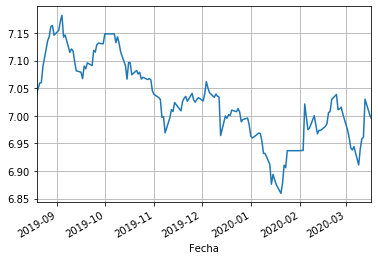

In [43]:
data['Apertura'].plot(grid=True)

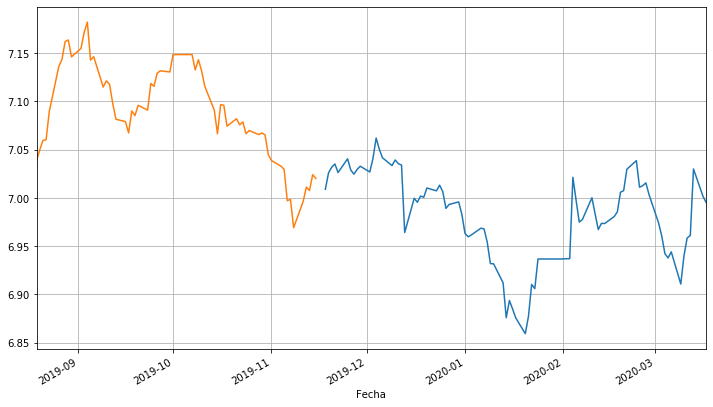

In [58]:
#https://www.eltiempo.com/mundo/asia/primer-contagio-de-covid-19-en-china-fue-en-noviembre-segun-prensa-472466
plt.figure(figsize=(12,7))
data[:'2019-11-17']['Apertura'].plot(grid=True)
data['2019-11-17':]['Apertura'].plot(grid=True)

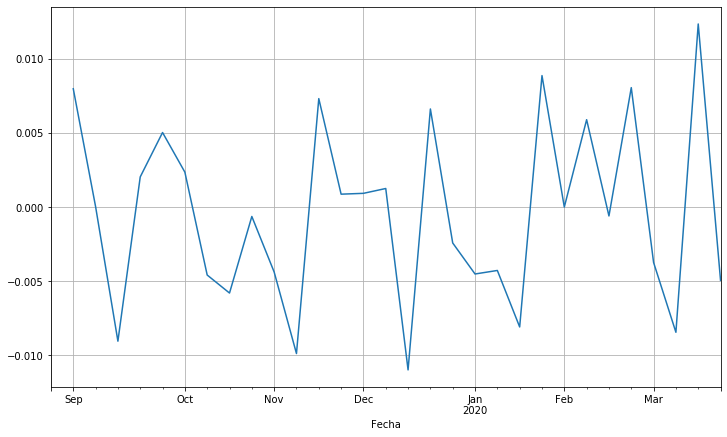

In [62]:
plt.figure(figsize=(12,7))
data_week = data.resample(rule='W').last()
data_week_pct = data_week.pct_change()
data_week_pct['Apertura'].plot(grid=True)